<a href="https://colab.research.google.com/github/LarissaCastor/Enem_Microdados_Python/blob/main/Atividade02_Ayslan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Atividade Avaliativa**

DISCIPLINA: ESTATISTICA

PROFESSOR: AYSLAN SANTOS P DA COSTA

*Orientação: utilizem as bibliotecas scipy.stats e statsmodels para auxiliar nas soluções
das questões propostas.*

#ALUNOS:



*   Larissa Castor Ramos
*   João Antônio Silveira Matos
*   Samuel Moreira da Cruz
*   Tenisson José Andrade Fonseca





In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.stats.diagnostic import lilliefors
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd


In [4]:
df = pd.read_csv('/content/drive/MyDrive/Aula_Python_Ayslan/microdados_enem_nordeste (1).csv', sep=';', decimal= ',', encoding='utf-8', encoding_errors='ignore')
pd.set_option('display.max_columns', None)  #apresentar todas as colunas
df.head(2)

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,210060214087,2023,17 anos,Feminino,Solteiro(a),Parda,Brasileiro(a),Estou cursando e concluirei o Ensino Médio em ...,Não informado,Pública,Ensino Regular,Nao,2304400.0,Fortaleza,23.0,CE,Estadual,Urbana,Em atividade,2304400,Fortaleza,23,CE,Presente na prova,Presente na prova,Presente na prova,Presente na prova,Cinza,Amarela,Amarela,Cinza,459.0,508.5,507.2,466.7,Ingles,Sem problemas,140.0,200.0,160.0,180.0,200.0,880.0,Completou a 8a serie/9o ano do ensino fundamen...,Completou a 8a serie/9o ano do ensino fundamen...,Grupo 2,Grupo 2,5,"De R$ 1.320,01 ate R$ 1.980,00.",Nao,"Sim, um","Sim, um",Nao,Nao,"Sim, um",Nao,Nao,Nao,Nao,Nao,Nao,"Sim, um",Nao,Nao,"Sim, tres",Nao,Nao,Sim
1,210059980948,2023,18 anos,Feminino,Solteiro(a),Parda,Brasileiro(a),Estou cursando e concluirei o Ensino Médio em ...,Não informado,Pública,Ensino Regular,Nao,2311306.0,Quixad,23.0,CE,Estadual,Urbana,Em atividade,2311306,Quixad,23,CE,Presente na prova,Presente na prova,Presente na prova,Presente na prova,Amarela,Azul,Azul,Amarela,402.5,379.2,446.9,338.3,Ingles,Sem problemas,120.0,120.0,120.0,120.0,80.0,560.0,Nao completou a 4a serie/5o ano do ensino fund...,Nao completou a 4a serie/5o ano do ensino fund...,Grupo 1,Grupo 1,4,"Ate R$ 1.320,00",Nao,"Sim, um",Nao,Nao,Nao,"Sim, um",Nao,Nao,Nao,Nao,Nao,Nao,"Sim, um",Nao,Nao,"Sim, um",Nao,Nao,Nao


1. Utilizando o microdados do ENEM
verifique se as notas de matemática (NU_NOTA_MT), para cada estado, podem ser aproximada por uma distribuição Normal. (Dica: use o teste de Shapiro-Wilk ou Kolmogorov-Smirnov em uma amostra).

*Antes de aplicar análises comparativas entre estados, é importante verificar se a hipótese de normalidade é razoável. Caso as notas se aproximem de uma Normal, o uso de avaliações com técnicas paramétricas são recomendadas. O teste Shapiro-Wilk é mais indicado para amostras menores, então será escolhido o teste Kolmogorov-Smirnov (KS). Outra opção é o teste Lilliefors, também indicado para grandes amostras principalmente quando os parâmetros da Normal são estimados por dados como na base dos microdados do Enem. Se ambos (KS e Lilliefors) rejeitarem H₀, a evidência contra a normalidade é bem robusta.*

In [5]:
#Definindo a função para o teste Kolmogorov-Smirnov
def ks_test_normal(series):
    series = series.dropna()                                                       #tratamento para valores nulos
    mu, sigma = series.mean(), series.std(ddof=0)                                  #parâmetros da Normal teórica .: mu -> média das notas; sigma -> desvio padrão (dp); ddof=0 -> dp da população
    stat, pvalue = stats.kstest(series, 'norm', args=(mu, sigma))                  #executa o teste ks
    return pd.Series({'D_statistic': stat, 'p_value': pvalue})

# Aplicando o teste para cada estado e visualizando
ks_results = (df.groupby('SG_UF_PROVA')['NU_NOTA_MT']
              .apply(ks_test_normal)
              .unstack()
              .reset_index()
              .rename(columns={'SG_UF_PROVA': 'UF'}))
ks_results

,UF,D_statistic,p_value
0,AL,0.070669,3.743839e-239
1,BA,0.068803,0.000000e+00
2,CE,0.065179,0.000000e+00
3,MA,0.085056,0.000000e+00
4,PA,0.082198,0.000000e+00
5,PB,0.068217,0.000000e+00
6,PI,0.082411,0.000000e+00
7,RN,0.057990,2.656109e-213
8,SE,0.070526,1.411098e-204


In [6]:
#Para mesma avaliação, porém aplicando teste Lilliefors
#definindo a função
def lillie_normal(series, dist='norm', pvalmethod='table'):                      #definição da função
    x = series.dropna().astype(float)                                            #tratamento de dados faltantes e definição dos dados para float
    ks_stat, p_value = lilliefors(x, dist=dist, pvalmethod=pvalmethod)           #execução do teste de Lilliefors
    return pd.Series({'ks_stat': ks_stat, 'p_value': p_value})                   #retorna estatística KS ajustada e p_value

#organização dos resultados para visualização em df
lf_results = (df.groupby('SG_UF_PROVA')['NU_NOTA_MT']                            #agrupamento por UF
              .apply(lillie_normal)                                              #retorna ks_stat e p_value
              .unstack()                                                         #organiza os resultados em colunas
              .reset_index()                                                     #organiza o índice
              .rename(columns={'SG_UF_PROVA': 'UF'}))                            #renomeia a coluna referente ao estado

lf_results

,UF,ks_stat,p_value
0,AL,0.070671,0.001
1,BA,0.068803,0.001
2,CE,0.065180,0.001
3,MA,0.085057,0.001
4,PA,0.082199,0.001
5,PB,0.068219,0.001
6,PI,0.082412,0.001
7,RN,0.057991,0.001
8,SE,0.070528,0.001


**Explicação:**  *A partir da função executada, foram retornados os valores d_statistic que representam as maiores diferenças entre a função da distribuição acumulada empírica e a Normal teórica; e o p_value representando a probabilidade de observar essa diferença se os dados realmente fossem normais. Em geral, quando o valor p é menor do que o nível de significância (comumente 0.05), rejeitamos a hipótese nula de que os dados seguem uma distribuição normal. Analisando os resultados ks_results_df e lilliefors_results_df, todos os valores p são muito menor do que o nível de significância comum de 0.05 (ou até mesmo 0.01). Portanto, rejeita-se a hipótese de normalidade para a nota de matemática em todos os estados listados.*

*   [Documentação - Kolmogorov-Smirnov](https://www.statsmodels.org/dev/generated/statsmodels.stats.diagnostic.kstest_normal.html)
*   [Documentação - Diagnostic Lilliefors](https://www.statsmodels.org/dev/generated/statsmodels.stats.diagnostic.lilliefors.html)



---



2. Utilizando o microdados do ENEM, faça um comparativo entre a médias das notas de matemática (NU_NOTA_MT) e verifique, por estado, se houve diferença significativa entre os estados com nível de confiança de 90, 95 e 99%. Apresente os resultados em forma de tabela.

In [10]:
#Preparação dos dados
data = (df[['SG_UF_PROVA', 'NU_NOTA_MT']].dropna().rename(columns={'SG_UF_PROVA': 'UF', 'NU_NOTA_MT': 'nota_mat'}))

In [17]:
#Agrupamento das médias das notas por estado
tabela_medias = data.groupby('UF')['nota_mat'].mean().round(2)
tabela_medias

,nota_mat
UF,
AL,508.29
BA,505.95
CE,523.28
MA,482.90
PA,484.22
PB,513.64
PI,502.63
RN,525.33
SE,509.53


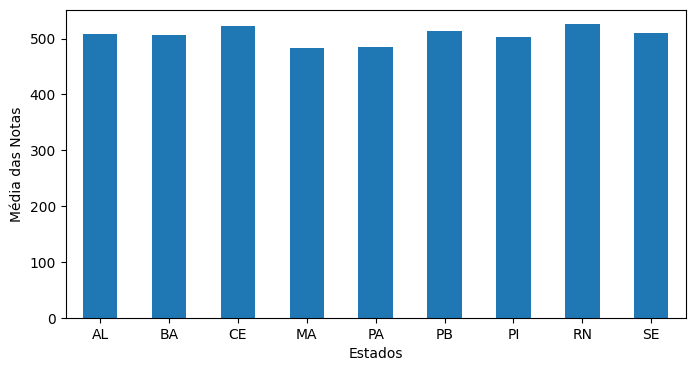

In [22]:
#Gráfico de barras para visualizar a tabela_medias
tabela_medias.plot(kind='bar', figsize=(8, 4))
plt.xlabel('Estados')
plt.ylabel('Média das Notas')

plt.xticks(rotation=360)
plt.show()

In [24]:
#Ajuste do modelo OLS com fator categórico
model_ols = ols('nota_mat ~ C(UF, Sum)', data=data).fit()

#Versão robusta a heterocedasticidade (HC3), ainda no padrão anova_lm
anova= sm.stats.anova_lm(model_ols, typ=2, robust='hc3')
anova['eta_sq'] = anova['sum_sq'] / anova['sum_sq'].sum()
anova[['sum_sq','df','F','PR(>F)','eta_sq']]

,sum_sq,df,F,PR(>F),eta_sq
"C(UF, Sum)",2.261168e+08,8.0,1829.443002,0.0,0.01452
Residual,1.534643e+10,993307.0,NaN,NaN,0.98548


* Anova OLS
[Documentação - ANOVA (OLS)](https://www.statsmodels.org/stable/anova.html)
* Assumindo erros padrão robustos de heterocedasticidade de MacKinnon e White (1985).
:
[Documentação - OLS (robust=HC3):](https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLSResults.html)

Onde:

* sum_sq: soma de quadrados (SS) atribuída ao termo — quantifica a variabilidade explicada (ou residual).
* df: graus de liberdade.
* F: teste estatístico F .: (MS_termo / MS_resíduo), onde MS = sum_sq / df.
* PR(>F): p-valor do teste F.
* eta_sq: eta quadrado (η²) .: SS_termo / SS_total, proporção da variância total explicada pelo termo.

**Explicação:** *É observado que o valor de eta_sq é baixo (0,01452), isso pode ser explicado devido à variação entre a soma dos quadrados (variabilidade entre as médias) nos UFs é pequena comparada à variação dentro das UFs (entre alunos). Já o valor PR(>F) < 0.001 rejeita Ho, demonstrando significância entre as médias de matemática a 90%, 95% e 99% de confiança.*



---



3. Faça uma comparação entre os estados da BA, SE, AL, PE, PB, RN, CE. E avalie se, em média, o desempenho dos alunos em matemática teve diferença significativa. Se não teve, identifique quais estados não o desempenho dos alunos em matemática não tiveram diferença significativas (utilize um grau de confiança de 95 e 99%)

In [26]:
#Tukey's HSD test - 95% de confiança
tukey_95 = pairwise_tukeyhsd(endog=data['nota_mat'], groups=data['UF'], alpha=0.05)

print(tukey_95)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj   lower    upper   reject
------------------------------------------------------
    AL     BA  -2.3387 0.0026  -4.1769  -0.5006   True
    AL     CE  14.9915    0.0  13.1048  16.8782   True
    AL     MA -25.3892    0.0 -27.3955 -23.3829   True
    AL     PA -24.0752    0.0 -25.9918 -22.1585   True
    AL     PB   5.3488    0.0   3.2511   7.4466   True
    AL     PI  -5.6631    0.0   -7.855  -3.4713   True
    AL     RN  17.0324    0.0  14.8541  19.2108   True
    AL     SE   1.2413 0.8099  -1.1781   3.6607  False
    BA     CE  17.3303    0.0  16.0933  18.5672   True
    BA     MA -23.0505    0.0 -24.4632 -21.6377   True
    BA     PA -21.7364    0.0 -23.0186 -20.4542   True
    BA     PB   7.6876    0.0   6.1478   9.2274   True
    BA     PI  -3.3244    0.0  -4.9901  -1.6586   True
    BA     RN  19.3712    0.0  17.7232  21.0192   True
    BA     SE     3.58    0.0   1.6245   5.5355   True
    CE    

In [ ]:
#Tukey's HSD test - 99% de confiança
tukey_99 = pairwise_tukeyhsd(endog=data['nota_mat'], groups=data['UF'], alpha=0.01)

print(tukey_99)

 Multiple Comparison of Means - Tukey HSD, FWER=0.01  
group1 group2 meandiff p-adj   lower    upper   reject
------------------------------------------------------
    AL     BA  -2.3387 0.0026  -4.4664  -0.2111   True
    AL     CE  14.9915    0.0  12.8076  17.1754   True
    AL     MA -25.3892    0.0 -27.7116 -23.0668   True
    AL     PA -24.0752    0.0 -26.2937 -21.8566   True
    AL     PB   5.3488    0.0   2.9207    7.777   True
    AL     PI  -5.6631    0.0  -8.2002   -3.126   True
    AL     RN  17.0324    0.0  14.5109  19.5539   True
    AL     SE   1.2413 0.8099  -1.5592   4.0418  False
    BA     CE  17.3303    0.0  15.8985  18.7621   True
    BA     MA -23.0505    0.0 -24.6857 -21.4152   True
    BA     PA -21.7364    0.0 -23.2206 -20.2522   True
    BA     PB   7.6876    0.0   5.9053   9.4699   True
    BA     PI  -3.3244    0.0  -5.2525  -1.3962   True
    BA     RN  19.3712    0.0  17.4636  21.2788   True
    BA     SE     3.58    0.0   1.3165   5.8436   True
    CE    

*   [Documentação - Tukey](https://www.statsmodels.org/dev/generated/statsmodels.stats.multicomp.pairwise_tukeyhsd.html)

**Explicação:** *Avaliando o teste de Tukey, tanto a 95% quanto a 99% de confiança, apenas a interação entre o estado de Alagoas X Sergipe e          Maranhão X Pará não apresentaram significancia (p>0,05 ou p>0,01, respectivamente).*